In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv(r"../../Dataset/clean_d_tweets.csv")
df2 = pd.read_csv(r"../../Dataset/clean_non_d_tweets.csv")

In [3]:
df1.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1261623711502753792,1261623711502753792,1.589630e+12,2020-05-16 01:45:07,-1000,NaN,the real reason why you be sad you be attach t...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1255537912491343872,1255537912491343872,1.588179e+12,2020-04-29 06:42:19,-1000,NaN,my biggest problem be overthinking everything,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1255524270521761792,1255524270521761792,1.588175e+12,2020-04-29 05:48:07,-1000,NaN,the worst sadness be the sadness you have teac...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1255524059334365186,1255524059334365186,1.588175e+12,2020-04-29 05:47:16,-1000,NaN,i cannot make you understand i cannot make any...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1172463022100512769,1172463022100512769,1.568372e+12,2019-09-13 00:52:22,-1000,NaN,i do not think anyone really understand how ti...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
df1.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [5]:
df_1 = pd.DataFrame(df1['tweet'])
df_2 = pd.DataFrame(df2['tweet'])

df_1['label'] = 1
df_2['label'] = 0

In [6]:
df_1.head()

,tweet,label
0,the real reason why you be sad you be attach t...,1
1,my biggest problem be overthinking everything,1
2,the worst sadness be the sadness you have teac...,1
3,i cannot make you understand i cannot make any...,1
4,i do not think anyone really understand how ti...,1


In [7]:
df_2.head()

,tweet,label
0,touch pass be the new asmr,0
1,12 years ago i call my dad and he give me some...,0
2,there be 6500 languages yet i choose to only s...,0
3,hey everyone ask for a raise today i be tell y...,0
4,i invest in 47 startups in a year here be how ...,0


In [8]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [9]:
df

,tweet,label
0,the real reason why you be sad you be attach t...,1
1,my biggest problem be overthinking everything,1
2,the worst sadness be the sadness you have teac...,1
3,i cannot make you understand i cannot make any...,1
4,i do not think anyone really understand how ti...,1
...,...,...
7764,cardi b want to trademark her catchphrase okur...,0
7765,i will bet kellyanne and george conway have pr...,0
7766,fan be always ask me how they can watch the ol...,0
7767,ray romano be a hilarious comedian a kind soul...,0


In [10]:
df['label'].value_counts()

label
0    4687
1    3082
Name: count, dtype: int64

In [11]:
df.to_csv("../../Dataset/Updated_Dataset/twitter_data.csv", index=False)

In [16]:
import pandas as pd

df = pd.read_csv("../../Dataset/Updated_Dataset/twitter_data_with_emotions.csv")
df.head()

,tweet,label,aspect
0,the real reason why you be sad you be attach t...,1,sadness
1,my biggest problem be overthinking everything,1,anger
2,the worst sadness be the sadness you have teac...,1,sadness
3,i cannot make you understand i cannot make any...,1,sadness
4,i do not think anyone really understand how ti...,1,joy


In [12]:
df['aspect'].value_counts()

aspect
neutral     2507
sadness     1622
joy         1542
anger        833
surprise     618
fear         519
disgust      104
Name: count, dtype: int64

In [13]:
df[df['label'] == 0]['aspect'].value_counts()

aspect
neutral     1907
joy         1171
sadness      468
surprise     419
anger        360
fear         297
disgust       48
Name: count, dtype: int64

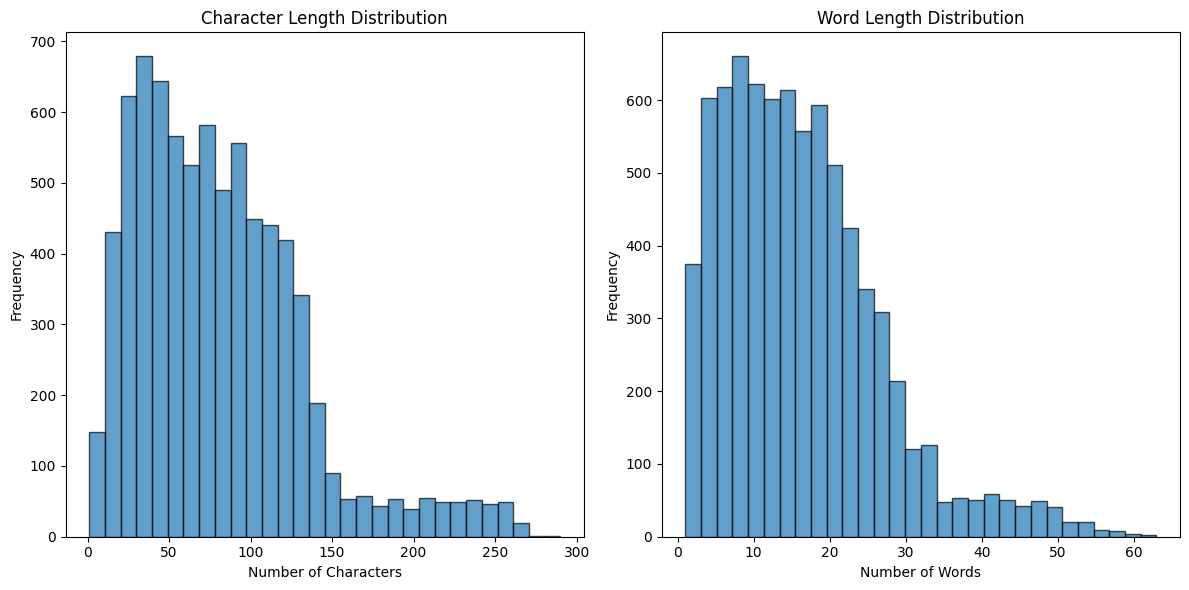

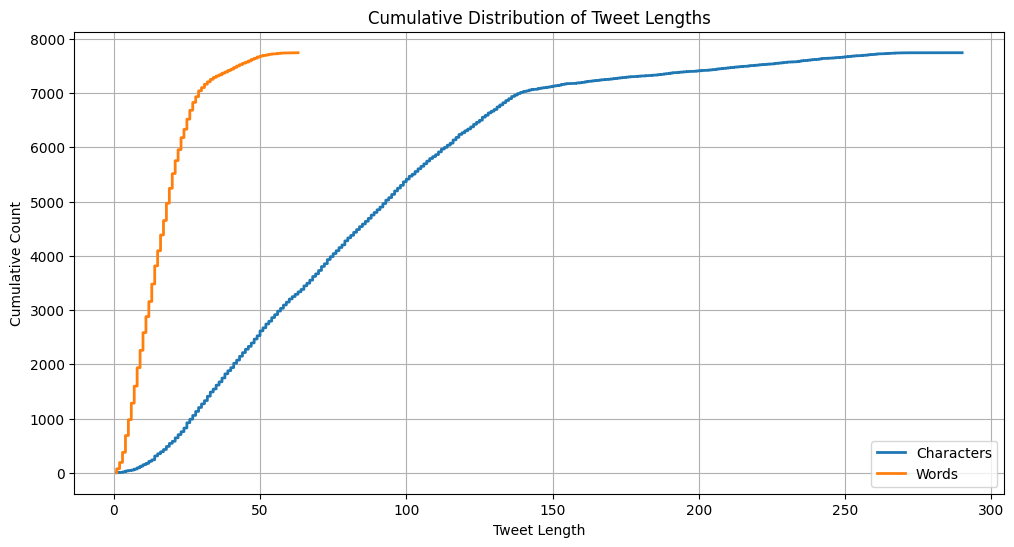

In [14]:
import matplotlib.pyplot as plt


# Calculate tweet lengths in terms of characters and words
df['char_length'] = df['tweet'].apply(len)
df['word_length'] = df['tweet'].apply(lambda x: len(x.split()))

# Summary statistics for tweet lengths
char_length_stats = df['char_length'].describe()
word_length_stats = df['word_length'].describe()

# Visualize the distribution of tweet lengths (characters and words)
plt.figure(figsize=(12, 6))

# Character length distribution
plt.subplot(1, 2, 1)
plt.hist(df['char_length'], bins=30, alpha=0.7, edgecolor='k')
plt.title('Character Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Word length distribution
plt.subplot(1, 2, 2)
plt.hist(df['word_length'], bins=30, alpha=0.7, edgecolor='k')
plt.title('Word Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display cumulative distribution for lengths
plt.figure(figsize=(12, 6))
plt.plot(sorted(df['char_length']), range(1, len(df) + 1), label="Characters", lw=2)
plt.plot(sorted(df['word_length']), range(1, len(df) + 1), label="Words", lw=2)
plt.title('Cumulative Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Cumulative Count')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from transformers import XLMRobertaTokenizer

MODEL_NAME = 'xlm-roberta-base'
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)

unique_tokens = set()
for tweet in df['tweet']:
    tokens = tokenizer.tokenize(tweet)
    unique_tokens.update(tokens)    

# Vocabulary size
vocab_size = len(unique_tokens)
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 6604


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into train (70%) and temp (30%)
train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label'])

# Split the temp data into validation (15%) and test (15%)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['label'])

# Print the sizes of each dataset
print(f"Train size: {len(train_data)}")
print(f"Validation size: {len(val_data)}")
print(f"Test size: {len(test_data)}")

# Save the datasets if needed
train_data.to_csv(r"../../Dataset/Updated_Dataset/train_data.csv", index=False)
val_data.to_csv(r"../../Dataset/Updated_Dataset/val_data.csv", index=False)
test_data.to_csv(r"../../Dataset/Updated_Dataset/test_data.csv", index=False)

Train size: 5421
Validation size: 1162
Test size: 1162
